In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

## №1

In [3]:
def make_intervals():
    last = 0
    end = 12 * 60
    intervals = []
    times = []
    while last < end:
        times.append(last)
        interval = 5 + random.randint(0, 1) * 5
        intervals.append(interval)
        last += interval
    intervals.append(720 - times[-1])
    intervals = np.array(intervals)
    times.append(720)
    times = np.array(times)
    return intervals, times

а)

(array([   7.,   67.,  650., 1298., 2175., 3456., 1389.,  806.,  122.,
          30.]),
 array([ 85. ,  87.4,  89.8,  92.2,  94.6,  97. ,  99.4, 101.8, 104.2,
        106.6, 109. ]),
 <a list of 10 Patch objects>)

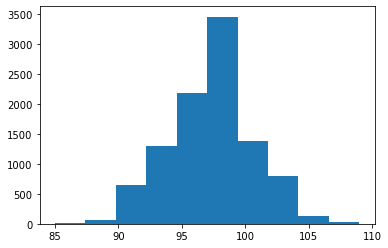

In [4]:
data = np.array([make_intervals()[0].shape[0] for _ in range(10000)])
plt.hist(data)

б)

In [180]:
data = np.array([np.random.choice(make_intervals()[0], 1) for _ in range(1000)])

Mean = 7.525
Dispercion = 6.249375


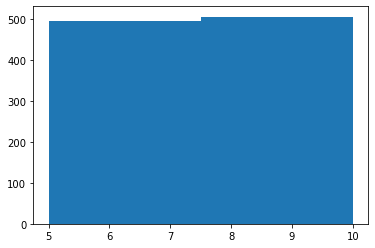

In [181]:
plt.hist(data, bins=2)
print("Mean = {}\nDispercion = {}".format(data.mean(), data.std() ** 2))

в)

In [209]:
data = np.array([d[0][(d[1] < random.randint(0, 720)).sum() - 1] for d in [make_intervals() for _ in range(1000)]])

Mean = 8.345
Dispercion = 5.535975


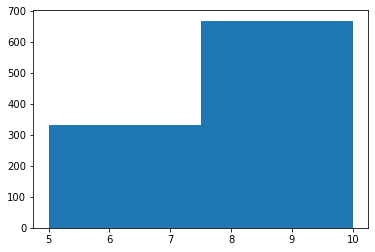

In [211]:
plt.hist(data, bins=2)
print("Mean = {}\nDispercion = {}".format(data.mean(), data.std() ** 2))

г)

In [233]:
def make_intervals_exp():
    last = 0
    end = 12 * 60
    intervals = []
    times = []
    while last < end:
        times.append(last)
        interval = random.expovariate(1 / 10)
        intervals.append(interval)
        last += interval
    intervals.append(720 - times[-1])
    intervals = np.array(intervals)
    times.append(720)
    times = np.array(times)
    return intervals, times


(array([  3.,  10.,  85., 129., 256., 265., 144.,  75.,  27.,   6.]),
 array([ 45. ,  50.7,  56.4,  62.1,  67.8,  73.5,  79.2,  84.9,  90.6,
         96.3, 102. ]),
 <a list of 10 Patch objects>)

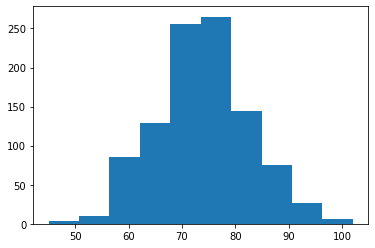

In [234]:
data = np.array([make_intervals_exp()[0].shape[0] for _ in range(1000)])
plt.hist(data)

In [235]:
data = np.array([np.random.choice(make_intervals_exp()[0], 1) for _ in range(1000)])

Mean = 10.418699583080038
Dispercion = 99.88708968166658


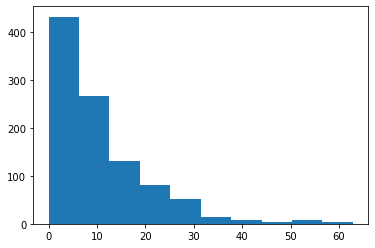

In [236]:
plt.hist(data)
print("Mean = {}\nDispercion = {}".format(data.mean(), data.std() ** 2))

In [237]:
data = np.array([d[0][(d[1] < random.randint(0, 720)).sum() - 1] for d in [make_intervals_exp() for _ in range(1000)]])

Mean = 20.77231687894245
Dispercion = 214.55976107103297


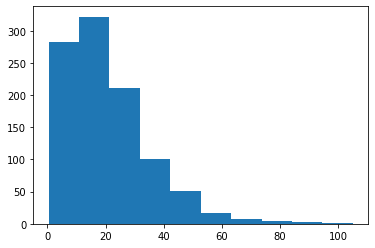

In [240]:
plt.hist(data)
print("Mean = {}\nDispercion = {}".format(data.mean(), data.std() ** 2))

## №2

In [5]:
from copy import deepcopy
def casino1(vector):
    P = 0.49
    dif = np.random.choice([1, -1], size=vector.shape[0], p=[P, 1-P])
    return vector + dif
def casino2(vector):
    P = np.where(vector % 3, 74, 9)
    rands = np.random.randint(100, size=vector.shape[0])
    dif = np.where(rands < P, 1, -1)
    return vector + dif

def casino3(vector):
    choice = np.random.choice([0, 1], size=vector.shape)
    ind_0 = (choice == 0)
    ind_1 = (choice == 1)
    vector[ind_0] = casino1(vector[ind_0])
    vector[ind_1] = casino2(vector[ind_1])
    return vector
    
def atos(N):
    sims = np.ones((N, 1000)) * 1000
    for i in range(1, 1000):
        sims[:, i] = casino1(sims[:, i - 1])
    return sims
def portos(N):
    sims = np.ones((N, 1000)) * 1000
    for i in range(1, 1000):
        sims[:, i] = casino2(sims[:, i - 1])
    return sims
def aramis(N):
    sims = np.ones((N, 1000)) * 1000
    for i in range(1, 1000):
        sims[:, i] = casino3(sims[:, i - 1])
    return sims

а)

In [7]:
simulations = atos(10000)

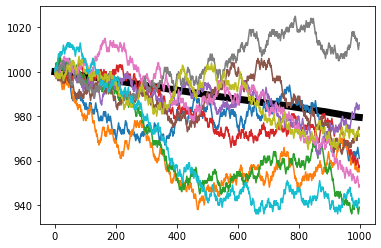

In [8]:
plt.plot(np.arange(1000), simulations.mean(axis=0), linewidth=7, color='black')
for s in np.random.choice(np.arange(simulations.shape[0]), 10):
    plt.plot(np.arange(1000), simulations[s])

б)

In [452]:
simulations = portos(1000)

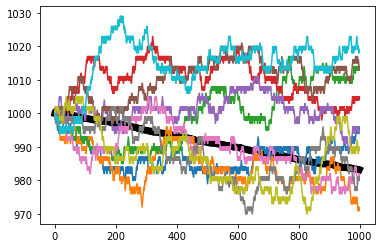

In [484]:
plt.plot(np.arange(1000), simulations.mean(axis=0), linewidth=7, color='black')
for s in np.random.choice(np.arange(simulations.shape[0]), 10):
    plt.plot(np.arange(1000), simulations[s])

в)

In [503]:
simulations = aramis(1000)

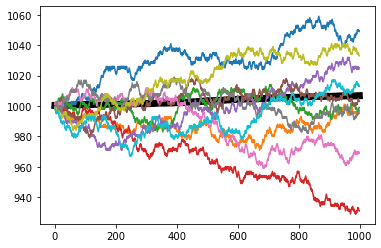

In [504]:
plt.plot(np.arange(1000), simulations.mean(axis=0), linewidth=7, color='black')
for s in np.random.choice(np.arange(simulations.shape[0]), 10):
    plt.plot(np.arange(1000), simulations[s])

## № 3

In [525]:
def get_info(n):
    students = np.round(np.random.normal(60, 10, (1000, 2)))
    sums = np.sum(students, axis=1)
    ok = (sums > n).sum()
    ok_students = students[sums > n]
    no_students = students[sums <= n]
    correlation_ok = np.corrcoef(ok_students[:,0], ok_students[:,1])[0, 1]
    correlation_no = np.corrcoef(no_students[:,0], no_students[:,1])[0, 1]    
    return ok, correlation_ok, correlation_no

ns = np.arange(80, 160, 5)
arr = np.asarray([get_info(n) for n in ns])
oks = arr[:, 0]
corr_ok = arr[:, 1]
corr_no = arr[:, 2]

а)

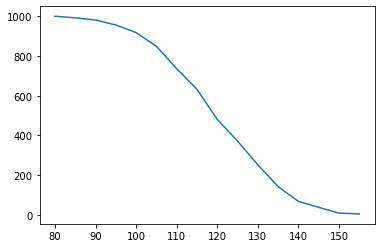

In [526]:
plt.plot(ns, oks)

б)

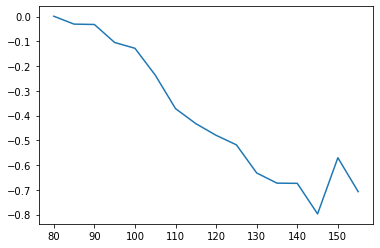

In [527]:
plt.plot(ns, corr_ok)

в)

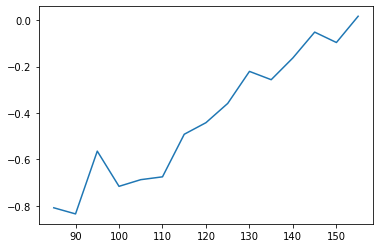

In [528]:
plt.plot(ns, corr_no)